In [2]:
import numpy as np
import pandas as pd


In [3]:
#Since other special are included thus we use encoding = "ISO-8859-1"

df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Preprocessing


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"],inplace = True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.duplicated().sum()

403

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.rename({"v1": "target","v2": "message"},axis = 1,inplace = True)

In [12]:
df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## EDA


In [13]:
import seaborn as sns

In [14]:
df["target"].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

In [15]:
df["target"].unique()

array(['ham', 'spam'], dtype=object)

<Axes: xlabel='target', ylabel='Count'>

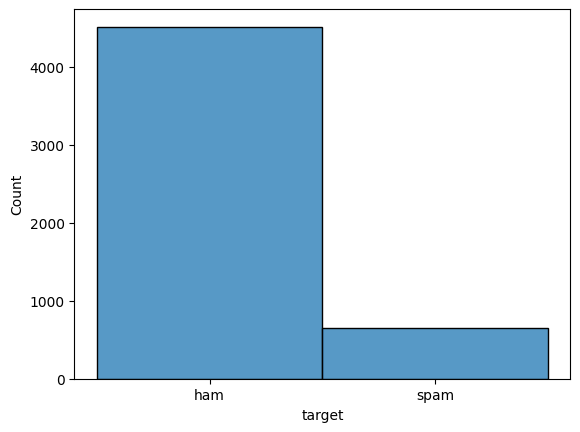

In [16]:
sns.histplot(data = df, x = df["target"])

In [17]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

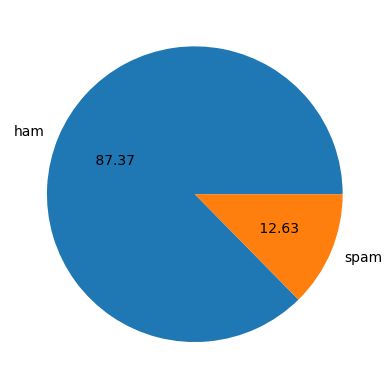

In [18]:
plt.pie(x  = df["target"].value_counts(),autopct = " %0.2f",labels = df["target"].unique())
plt.show

In [19]:
#conclusion It is an imbalance dataset

## Feature Creation

In [20]:
#generating some feature like number of words in both the categories

In [21]:
df["message"][0]


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [22]:
df["character_count"] = df["message"].apply(len)

In [23]:
df

,target,message,character_count
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [24]:
from nltk import sent_tokenize

In [25]:
from nltk import word_tokenize

In [26]:
df["word_count"] = df["message"].apply(word_tokenize).apply(len)

In [27]:
df["sent_count"] = df["message"].apply(lambda x: len(sent_tokenize(x)))

In [28]:
df

,target,message,character_count,word_count,sent_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [29]:
df[["character_count","word_count","sent_count"]].describe()

,character_count,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df["target"] == "ham"][["character_count","word_count","sent_count"]].describe()

,character_count,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df["target"] == "spam"][["character_count","word_count","sent_count"]].describe()

,character_count,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
#conclusion:- Average len spam is greater than non-spam

<Axes: xlabel='character_count', ylabel='Count'>

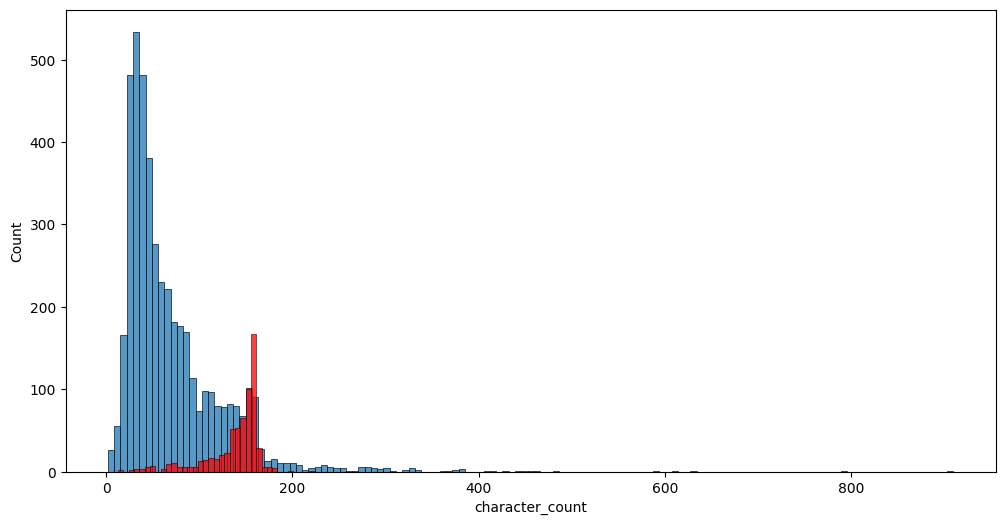

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == "ham"]['character_count'])
sns.histplot(df[df['target'] == "spam"]['character_count'],color='red')

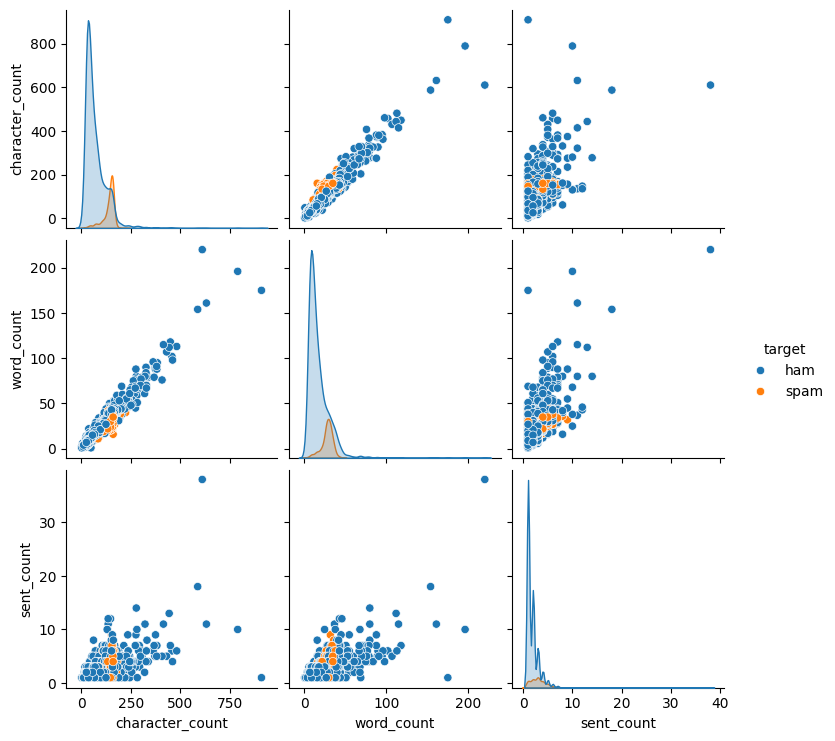

In [34]:
sns.pairplot(df,hue = "target")

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()
df["target"] = le.fit_transform(df["target"])

In [37]:
df

,target,message,character_count,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [38]:
#  0 is Ham
# 1 is Spam

<Axes: >

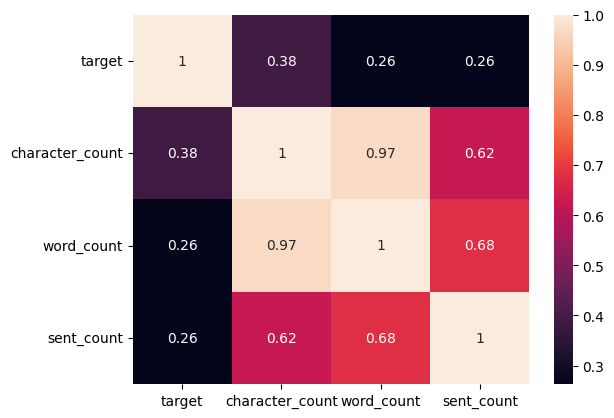

In [39]:
sns.heatmap(df.drop(columns = ["message"]).corr(),annot=True)

In [40]:
#conclusion We have character_count as another feature which strongly corelate with the target 

## Text Preprocessing

In [41]:
from nltk.corpus import stopwords

In [42]:
import string

In [43]:
from nltk.stem.porter import PorterStemmer

In [44]:
ps = PorterStemmer()

In [45]:
import re

In [46]:
def text_transform(text):
    
    text = text.lower()

    # Define the regular expression pattern for special characters
    pattern = re.compile(r'[^a-z0-9\s]')
    
    # Replace special characters with an empty string
    text = re.sub(pattern, '', text)

    list = []
    
    for i in text.split():
        if (i not in stopwords.words("english")):
            list.append(i)
    text = list[:]
    list.clear()

    for i in text:
        list.append(ps.stem(i))
        
    text = list[:]
    list.clear()
    return " ".join(text)
    
    
        

In [47]:
df['transformed_text'] = df['message'].apply(text_transform)

In [48]:
df

,target,message,character_count,word_count,sent_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u u 750 pound prize 2 c...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood soani suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like id interest buy someth els ...


In [49]:
from wordcloud import WordCloud

In [50]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [51]:
ham_word_cloud = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep = " "))

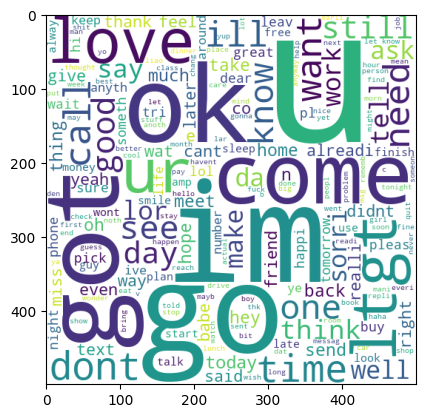

In [52]:
plt.imshow(ham_word_cloud)

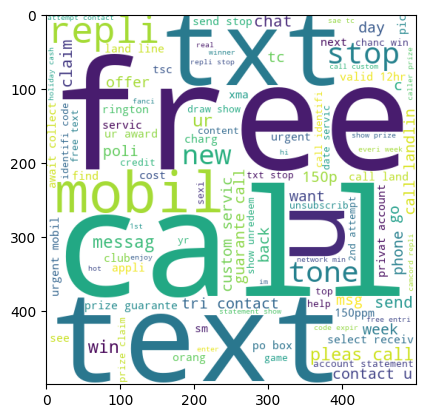

In [53]:
spam_word_cloud = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep = " "))
plt.imshow(ham_word_cloud)

In [54]:
df[df['target'] == 1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18',
 'freemsg hey darl 3 week word back id like fun still tb ok xxx std chg send 150 rcv',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free membership 100000 prize jackpot txt word claim 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click httpwap xxxmobilemovieclubcomnqjkgighjjgcbl',
 'england v macedonia dont miss goalsteam news txt ur nation team 87077 eg england 87077 trywal scotland 4txt120 poboxox36504w45wq 16',
 'thank subscript rington uk mobil charg 5month pleas confirm repli ye rep

In [55]:
spam_corpus = (df[df["target"] == 1]["transformed_text"].str.cat(sep = " ").split())

In [56]:
spam_corpus


['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'questionstd',
 'txt',
 'ratetc',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 '150',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 '900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 '20000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150pday',
 '6day',
 '16',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 '100000',
 'prize

In [57]:
from collections import Counter

In [58]:
Counter(spam_corpus).most_common(30)

[('call', 321),
 ('free', 188),
 ('2', 155),
 ('txt', 137),
 ('u', 123),
 ('text', 121),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 103),
 ('repli', 100),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('tone', 62),
 ('send', 59),
 ('urgent', 58),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('week', 49),
 ('pleas', 49),
 ('win', 48),
 ('tc', 44),
 ('collect', 44),
 ('min', 44)]

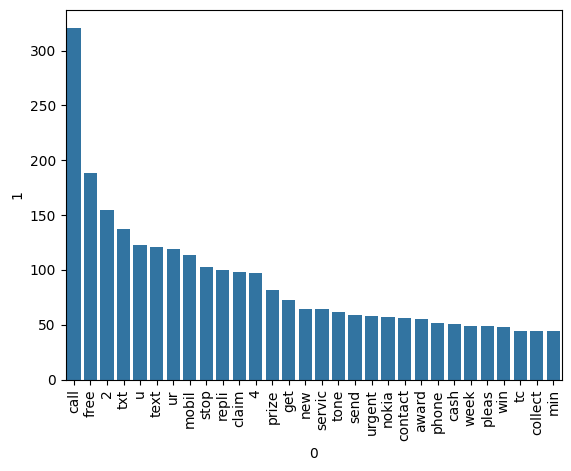

In [59]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

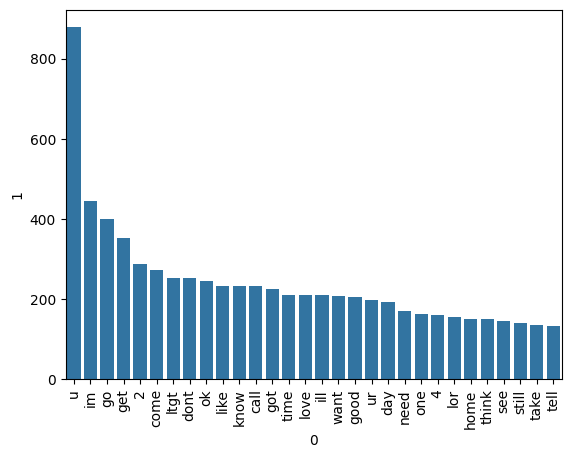

In [60]:
ham_corpus = (df[df["target"] == 0]["transformed_text"].str.cat(sep = " ").split())
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [61]:
df.head()

,target,message,character_count,word_count,sent_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [167]:
df["transformed_text"][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

## Model Building

In [133]:
from sklearn.feature_extraction.text import CountVectorizer

In [134]:
cv = CountVectorizer()

In [135]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [136]:
X.shape

(5169, 7983)

In [137]:
y = df["target"].values

In [138]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [139]:
gb = GaussianNB()
mb = MultinomialNB()

bb =BernoulliNB()

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [141]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [142]:
gb.fit(X_train,y_train)
mb.fit(X_train,y_train)
bb.fit(X_train,y_train)

BernoulliNB()

In [143]:
y1 = gb.predict(X_test)
y2  = mb.predict(X_test)
y3 = bb.predict(X_test)

In [144]:
print(accuracy_score(y_test,y1))
print(accuracy_score(y_test,y2))
print(accuracy_score(y_test,y3))

0.8820116054158608
0.9661508704061895
0.9709864603481625


In [145]:
print(precision_score(y_test,y1))
print(precision_score(y_test,y2))
print(precision_score(y_test,y3))

0.5353982300884956
0.8366013071895425
0.9821428571428571


In [146]:
from sklearn.model_selection import cross_validate

In [147]:
dict = cross_validate(gb,X,y,cv = 10, scoring = ["accuracy","precision"])

In [148]:
print(dict["test_accuracy"].mean())
print(dict["test_precision"].mean())

0.869798929422878
0.4924332776152509


In [149]:
dict2 = cross_validate(mb,X,y,cv = 10, scoring = ["accuracy","precision"])
print(dict2["test_accuracy"].mean())
print(dict2["test_precision"].mean())

0.9744632120312475
0.8777113950466807


In [150]:
dict3 = cross_validate(bb,X,y,cv = 10, scoring = ["accuracy","precision"])
print(dict3["test_accuracy"].mean())
print(dict3["test_precision"].mean())

0.9740771145397566
0.9668579861603697


In [151]:
!pip install xgboost

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [153]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [154]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [155]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [156]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  0.9821428571428571
For  DT
Accuracy -  0.9284332688588007
Precision -  0.9
For  LR
Accuracy -  0.9777562862669246
Precision -  0.9914529914529915
For  RF
Accuracy -  0.9690522243713733
Precision -  1.0


D:\Python\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9680851063829787
Precision -  0.972972972972973
For  BgC
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  ETC
Accuracy -  0.971953578336557
Precision -  0.9823008849557522
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9468085106382979
For  xgb
Accuracy -  0.9777562862669246
Precision -  0.9914529914529915


In [130]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [157]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [131]:

new_df = performance_df.merge(temp_df,on='Algorithm')

In [158]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
5,RF,0.969052,1.000000
4,LR,0.977756,0.991453
10,xgb,0.977756,0.991453
8,ETC,0.971954,0.982301
2,NB,0.970986,0.982143
6,AdaBoost,0.968085,0.972973
9,GBDT,0.947776,0.946809
7,BgC,0.964217,0.931624
3,DT,0.928433,0.900000


In [88]:
# Voting Classifier
xgb = XGBClassifier(n_estimators=50,random_state=2)
lr =  LogisticRegression(solver='liblinear', penalty='l1')
rf = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [89]:
voting = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('rf', rf)],voting='soft')

In [90]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...)),
                             ('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [91]:

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9913793103448276


In [92]:
kn = KNeighborsClassifier()

In [94]:

from sklearn.ensemble import StackingClassifier

In [97]:
clf  = StackingClassifier(estimators=[('xgb', xgb), ('kn', kn),  ('lr', lr)],final_estimator = rf)

In [98]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9738878143133463
Precision 0.9512195121951219


In [161]:
#conclusion :- We will use RandomForestClassifier as we getting precision_score as 1. Which is our main concern

In [162]:

import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))